### An example showing the plot_feature_importances method used by a scikit-learn classifier

In this example, we'll be plotting a `learning_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.estimators.plot_learning_curve` method.

In [1]:
from sklearn.datasets import load_iris as data_3_classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.0.dev0+git.20250430.079ba10'

In [2]:
sp.estimators.plot_learning_curve?

Signature:
sp.estimators.plot_learning_curve(
    estimator,
    X,
    y,
    *,
    train_sizes=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    verbose=0,
    shuffle=False,
    random_state=None,
    fit_params=None,
    title='Learning Curves',
    title_fontsize='large',
    text_fontsize='medium',
    **kwargs,
)
Docstring:
Generates a plot of the train and test learning curves for a classifier.

The learning curves plot the performance of a classifier as a function of the number of
training samples. This helps in understanding how well the classifier performs
with different amounts of training data.

Parameters
----------
estimator : object type that implements the "fit" method
    An object of that type which is cloned for each validation. It must
    also implement "predict" unless `scoring` is a callable that doesn't
    rely on "predict" to compute a score.

X : array-like, shape (n_samples, n_features)
    Training data, where `n_samples` is the number of samples


In [2]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

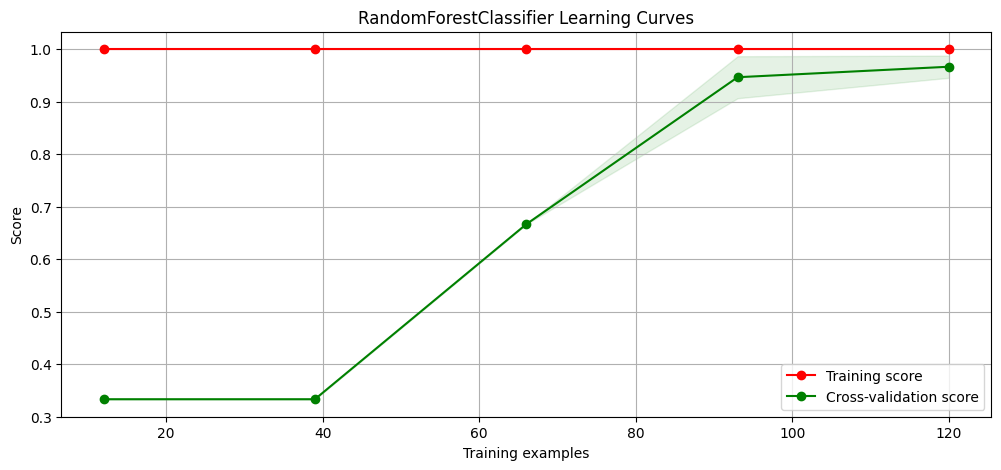

In [3]:
# Create an instance of the LogisticRegression
model = RandomForestClassifier(random_state=0)  # .fit(X_train, y_train)

# Plot!
ax = sp.estimators.plot_learning_curve(
    model, X, y
)

## Catboost

In [4]:
# !pip install catboost -Uq
from catboost import CatBoostClassifier

### Train model

In [5]:
model = CatBoostClassifier(iterations=250)
# %time clf.fit(train_pool, eval_set=test_pool, metric_period=10, plot=False, verbose=50)
model

/opt/conda/envs/py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:71: FutureWarning: `fit_params` is deprecated and will be removed in version {version}. Pass parameters via `params` instead.
  warnings.warn(
/opt/conda/envs/py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/envs/py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/py311/lib/python3.11/site-packages/ca

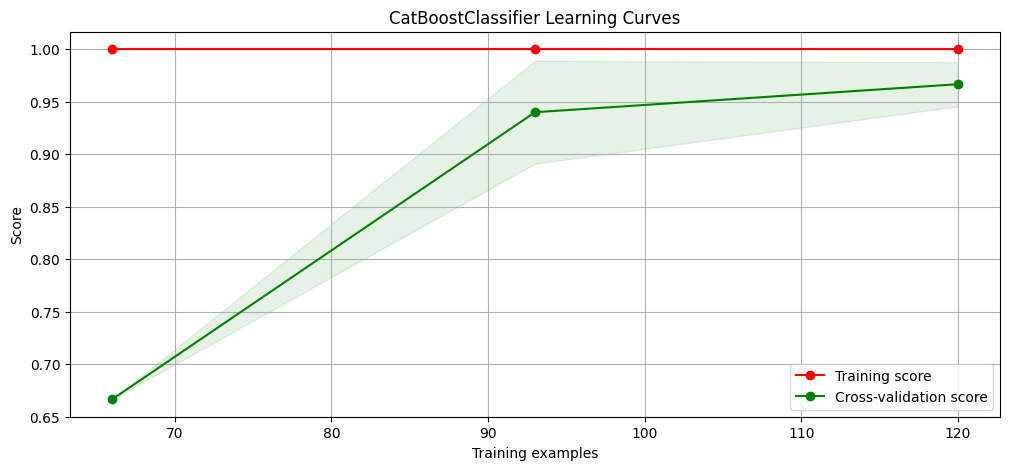

CPU times: user 11.6 s, sys: 23.4 s, total: 35.1 s
Wall time: 9.19 s


In [6]:
%%time

# Plot!
ax = sp.estimators.plot_learning_curve(
	model,
	X,
	y,
	fit_params={
		# 'metric_period': 100,
		'verbose': 0
	},
);